In [47]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

from skopt.benchmarks import branin
from skopt import Optimizer
from pyDOE import *

<Figure size 432x288 with 0 Axes>

In [48]:
def neg_branin(x):
    y = -1*branin(x)
    return y

In [49]:
def plot_branin_with_points(X):
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))
    ax.plot(X[:,0], X[:, 1], "k.", markersize=14, lw=0, label="points")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

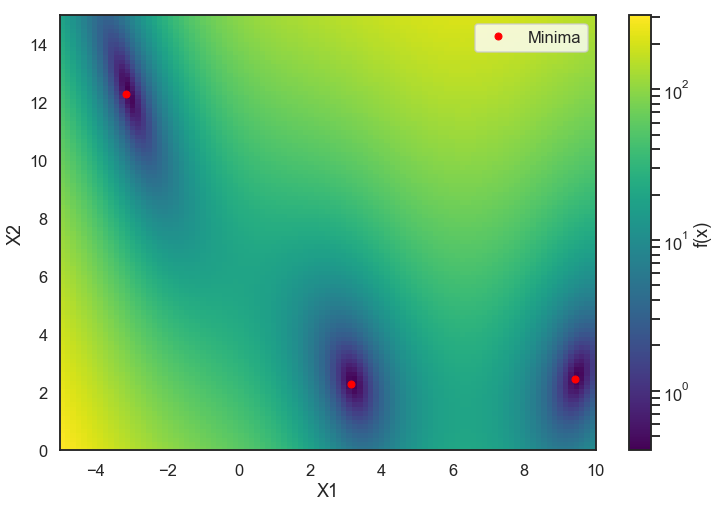

In [50]:
from matplotlib.colors import LogNorm

def plot_branin_with_minima():
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

plot_branin_with_minima()

In [72]:
ntrain = 100 # number of initial training points
d = 2 # number of dimensions of the input features

X_train_norm = lhs(2, samples= ntrain, criterion='maximin') # Initial training points
X_train = np.zeros(X_train_norm.shape)
X_train[:,0] = X_train_norm[:,0]*15 - 5.
X_train[:,1] = X_train_norm[:,1]*15
Y_train = neg_branin(X_train.T)
bounds = [(-5.0, 10.0), (0.0, 15.0)]

In [73]:
opt = Optimizer(bounds, base_estimator="gp", acq_func = 'EI',
                acq_optimizer = 'sampling', random_state = 123)

In [74]:
X_train

array([[-1.02495693e+00,  9.19005563e-01],
       [ 9.66545254e-01,  1.20700296e+01],
       [ 8.08827615e+00,  6.30310012e+00],
       [ 7.30133720e+00,  7.05101566e+00],
       [-3.53897593e+00,  5.33199351e+00],
       [-2.50351894e+00,  2.98302803e-01],
       [ 8.87867527e+00,  8.96470264e+00],
       [ 5.03337602e+00,  1.49740361e+01],
       [ 1.43653007e+00,  3.48368041e-01],
       [ 2.82673438e+00,  2.15895981e+00],
       [ 1.96130530e+00,  6.53679048e+00],
       [ 8.68943893e+00,  5.21999818e+00],
       [ 6.50899788e+00,  6.86150046e+00],
       [-2.61003850e+00,  9.34528662e+00],
       [ 4.46686441e+00,  1.88606402e+00],
       [-4.93265299e+00,  1.32929307e+01],
       [ 7.93481684e+00,  8.40255263e+00],
       [ 2.99394493e+00,  8.00827800e+00],
       [ 7.51679371e+00,  1.15151479e+01],
       [ 4.03504638e+00,  1.37629316e+01],
       [-1.46020343e+00,  3.24460673e+00],
       [-1.72607776e+00,  3.05753605e+00],
       [ 9.57759436e+00,  8.24574817e+00],
       [ 7.

In [75]:
opt.tell(X_train.tolist(), Y_train.tolist())

we are here :: other Acq than qEI


          fun: -246.8493032941627
    func_vals: array([ -61.87959017,  -71.5202843 ,  -30.0937222 ,  -48.50316901,
        -63.84739011, -112.45000242,  -49.56779554, -201.04925204,
        -24.47614634,   -1.01009398,  -16.33911824,  -13.73882829,
        -52.39468553,   -4.574702  ,   -7.84053123,  -25.79406079,
        -56.80125038,  -32.03414872, -116.79464284, -149.94662256,
        -39.73391981,  -45.41434934,  -32.30616296,  -31.49351882,
        -62.51323414, -117.54142539,  -21.81661026,  -19.60126805,
       -163.70367842,  -34.60837033, -144.74384005,  -14.19543793,
         -6.54152533,  -26.7358681 ,   -5.67327758,  -29.67598595,
        -59.99587369,  -19.00895095,  -73.3063604 ,  -10.08915116,
       -246.84930329,  -30.89483827,   -0.68140461, -105.3283945 ,
       -158.27022808,  -56.54307893,   -4.99194104,   -3.11420286,
        -20.666283  ,  -17.60774933,  -37.61875174,  -31.39684732,
         -4.67248664,  -13.13643552,  -11.22232544,  -21.12284486,
         -9.8

# RuiEI Acquisition

In [76]:
from skopt import acquisition

In [77]:
model = opt.models[-1]
y_opt = np.min(Y_train)

In [78]:
# Calculate EI for grid points in the space
values, mu, std = acquisition.gaussian_ei(X = opt.Xspace, model = model, y_opt = y_opt)

In [86]:
values[9786]

34.462364353051356

In [80]:
if np.max(values) <= 0:
    
    # If no good points, do pure exploration
    sig_order = np.argsort(-std, axis = 0)
    select_indices = sig_order[:num_sampled_points].tolist()
else:
    ei_order = np.argsort(-1*values, axis = 0)
    select_indices = [ei_order[0]]

In [81]:
select_indices

[9786]

In [82]:
ei_order

array([9786, 7697, 2732, ..., 3390, 3383, 9999])

In [83]:
values[np.argmax(values)]

34.462364353051356

In [84]:
np.array(opt.space.inverse_transform(opt.Xspace)[])

SyntaxError: invalid syntax (<ipython-input-84-6ba6c3fb5e55>, line 1)

IndexError: too many indices for array

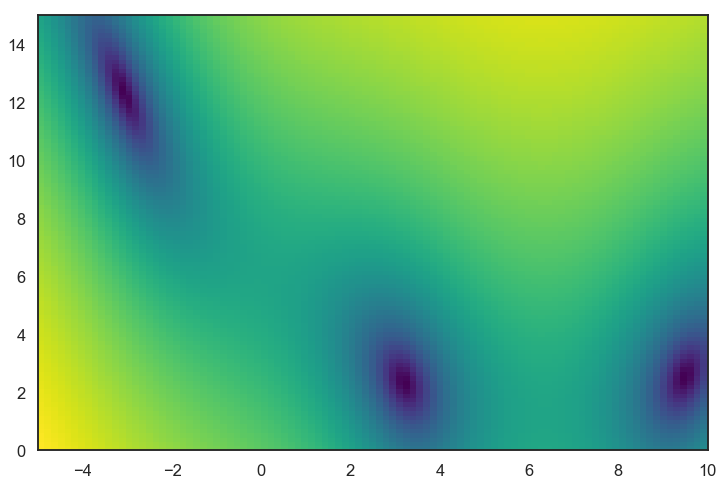

In [85]:
plot_branin_with_points(np.array(opt.space.inverse_transform(opt.Xspace)[9784]))

In [71]:
y_pred, sigma = model.predict(x_model, return_std=True)

NameError: name 'x_model' is not defined